In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#transform from rda to csv in R: https://www.youtube.com/watch?v=V5eJAcIqrnE&t=217s
member_df = pd.read_csv('members_zip.csv')
trx_df = pd.read_csv('trx_zip.csv')
product_df = pd.read_csv('products_zip.csv')

### member

In [3]:
#del member_df['Unnamed: 0']
member_df.head(5)
#date column: birth_yyyymm, first_enrol_date
#categorical: current_class, gender, martial_status

,Unnamed: 0,member_id,birth_yyyymm,first_enrol_date,current_class,gender,marital_status
0,1,1000001,1972-10,2003-12-21,SILVER,FEMALE,Single
1,2,1000002,1900-01,NaN,SILVER,UNKNOWN,Unknown
2,3,1000003,1969-05,2003-12-17,BLUE,FEMALE,Single
3,4,1000004,1952-05,2004-01-25,GOLD,FEMALE,Single
4,5,1000005,1996-11,2004-01-04,GOLD,FEMALE,Single


In [76]:

#convert date columns (str) to datetime
member_df['birth_yyyymm'] = pd.to_datetime(member_df['birth_yyyymm'])
member_df['first_enrol_date'] = pd.to_datetime(member_df['first_enrol_date'])
#create column of age
member_df['age'] = (pd.datetime.now().year-member_df['birth_yyyymm'].dt.year).astype('int')

In [67]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137812 entries, 0 to 137811
Data columns (total 7 columns):
member_id           137812 non-null int64
birth_yyyymm        137812 non-null datetime64[ns]
first_enrol_date    87791 non-null datetime64[ns]
current_class       137812 non-null object
gender              137812 non-null object
marital_status      137812 non-null object
age                 137812 non-null int64
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 7.4+ MB


In [68]:
member_df['member_id'].value_counts(dropna=False)
#137812 ID

1050623    1
1043671    1
1006785    1
1000642    1
1002691    1
          ..
1033133    1
1039278    1
1037231    1
1010616    1
1048576    1
Name: member_id, Length: 137812, dtype: int64

In [69]:
#extract info from datetime columns
import datetime as dt
member_df.first_enrol_date.dt.year.head()

0    2003.0
1       NaN
2    2003.0
3    2004.0
4    2004.0
Name: first_enrol_date, dtype: float64

In [70]:
#convert all string in categorical columns to lowercase (because the case is not consistent)
member_df.current_class = member_df.current_class.str.lower()
member_df.gender = member_df.gender.str.lower()
member_df.marital_status = member_df.marital_status.str.lower()
#impute nan values in these columns with unknown
member_df['gender'] = member_df['gender'].fillna('unknown')
member_df['current_class'] = member_df['current_class'].fillna('unknown')
member_df['marital_status'] = member_df['marital_status'].fillna('unknown')

member_df['gender'].value_counts(dropna=False) #female:male = 13.4

female     68547
unknown    64163
male        5102
Name: gender, dtype: int64

In [71]:
member_df['marital_status'].value_counts(dropna=False) #married:single = 1.4

unknown    91779
married    26749
single     19284
Name: marital_status, dtype: int64

In [72]:
member_df['current_class'].value_counts(dropna=False)

silver     53831
blue       49313
unknown    27033
gold        7635
Name: current_class, dtype: int64

In [77]:
#del member_df['Unnamed: 0']
member_df.head()

,member_id,birth_yyyymm,first_enrol_date,current_class,gender,marital_status,age
0,1000001,1972-10-01,2003-12-21,silver,female,single,48
1,1000002,1900-01-01,NaT,silver,unknown,unknown,120
2,1000003,1969-05-01,2003-12-17,blue,female,single,51
3,1000004,1952-05-01,2004-01-25,gold,female,single,68
4,1000005,1996-11-01,2004-01-04,gold,female,single,24


In [78]:
#convert current_class, gender, marital_status to one-hot encoding
class_df = pd.get_dummies(member_df.current_class)
member_df_encode = pd.concat([member_df,class_df],axis = 1)

gender_df = pd.get_dummies(member_df.gender)
member_df_encode = pd.concat([member_df_encode,gender_df],axis = 1)

marital_df = pd.get_dummies(member_df.marital_status)
member_df_encode = pd.concat([member_df_encode,marital_df],axis = 1)


member_df_encode.head()
#reference: why one-hot encoding compared to dummies 
#https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a

,member_id,birth_yyyymm,first_enrol_date,current_class,gender,marital_status,age,blue,gold,silver,unknown,female,male,unknown,married,single,unknown
0,1000001,1972-10-01,2003-12-21,silver,female,single,48,0,0,1,0,1,0,0,0,1,0
1,1000002,1900-01-01,NaT,silver,unknown,unknown,120,0,0,1,0,0,0,1,0,0,1
2,1000003,1969-05-01,2003-12-17,blue,female,single,51,1,0,0,0,1,0,0,0,1,0
3,1000004,1952-05-01,2004-01-25,gold,female,single,68,0,1,0,0,1,0,0,0,1,0
4,1000005,1996-11-01,2004-01-04,gold,female,single,24,0,1,0,0,1,0,0,0,1,0


In [82]:
#del member_df_encode['current_class']
#del member_df_encode['gender']
#del member_df_encode['marital_status']
#del member_df_encode['Unnamed: 0']
member_df_encode.columns = ['member_id','birth_yyyymm','first_enrol_date','age','current_class_blue','current_class_gold'
                     ,'current_class_silver','current_class_unknown','gender_female','gender_male','gender_unknown'
                     ,'marital_status_married','marital_status_single','marital_status_unknown']
member_df_encode.head()
#primary key: member_id, join trx_df on member_id

,member_id,birth_yyyymm,first_enrol_date,age,current_class_blue,current_class_gold,current_class_silver,current_class_unknown,gender_female,gender_male,gender_unknown,marital_status_married,marital_status_single,marital_status_unknown
0,1000001,1972-10-01,2003-12-21,48,0,0,1,0,1,0,0,0,1,0
1,1000002,1900-01-01,NaT,120,0,0,1,0,0,0,1,0,0,1
2,1000003,1969-05-01,2003-12-17,51,1,0,0,0,1,0,0,0,1,0
3,1000004,1952-05-01,2004-01-25,68,0,1,0,0,1,0,0,0,1,0
4,1000005,1996-11-01,2004-01-04,24,0,1,0,0,1,0,0,0,1,0


### transaction

In [15]:

del trx_df['Unnamed: 0']
trx_df.head(5)


,dim_site_key,dim_product_key,qty,gross_sales,retail_sales,discount,trx_date,member_id
0,33,8263,1,13.62,10.22,3.41,2011-08-19,1020729
1,50,9589,1,23.62,23.62,0.00,2011-07-07,1016212
2,71,9547,2,22.25,12.24,10.01,2011-08-17,1006743
3,50,791,1,13.62,13.62,0.00,2011-06-02,1086134
4,50,6852,1,9.88,9.88,0.00,2011-10-29,1017496


In [16]:
#check trx_date dtype
type(trx_df.iloc[0,6])
#convert to datetime
trx_df['trx_date'] = pd.to_datetime(trx_df['trx_date'])

In [17]:
#understanding columns of sales and discount
diff = trx_df['gross_sales']-trx_df['retail_sales']-trx_df['discount']
diff = diff.round(decimals = 0)
diff.value_counts(dropna=False)
#difference between round, truncate? and int

-0.0    1433837
dtype: int64

### product

In [18]:
del product_df['Unnamed: 0']
product_df.head(5)

,dim_product_key,regime,format,dept_code,class_code,dept_label,class_label
0,1,SERUM FACE,PRIMER,D10,C10100,SKINCARE,VIT 1
1,2,CLEANSER BODY,BAR,D12,C12600,FRAGRANCE,MY MUSK
2,4,DEODORANT,STICK,D23,C23261,BATH AND BODY,ALOE VERA
3,7,CLEANSER-FACE WASH,LOTION,D10,C10100,SKINCARE,VIT 1
4,9,PREPARE,DEODORANT,D23,C23261,BATH AND BODY,ALOE VERA


In [19]:
product_df['regime'].str.lower().value_counts(dropna=False)

base                722
moisturise          489
cleanse             443
eyes                345
NaN                 336
                   ... 
brl spritz            1
lip liner             1
hand cream            1
talc                  1
moisturiser neck      1
Name: regime, Length: 119, dtype: int64

In [20]:
product_df['format'].str.lower().value_counts(dropna=False)

prepack                 347
eye shadow              237
NaN                     221
body wash               200
others                  156
                       ... 
beard oil                 1
leave in conditioner      1
salt sugar                1
body splash               1
outer                     1
Name: format, Length: 201, dtype: int64

In [21]:
product_df['dept_label'].str.lower().value_counts(dropna=False)

makeup               1277
bath and body        1256
tools and brushes     656
fragrance             585
skincare              531
others hf             237
mens                  128
hair care             106
Name: dept_label, dtype: int64

In [ ]:
#how much money each customer spent
#how many products each customer bought
#what are the regimes/format each customer bought

In [22]:
trx_df.head()

,dim_site_key,dim_product_key,qty,gross_sales,retail_sales,discount,trx_date,member_id
0,33,8263,1,13.62,10.22,3.41,2011-08-19,1020729
1,50,9589,1,23.62,23.62,0.00,2011-07-07,1016212
2,71,9547,2,22.25,12.24,10.01,2011-08-17,1006743
3,50,791,1,13.62,13.62,0.00,2011-06-02,1086134
4,50,6852,1,9.88,9.88,0.00,2011-10-29,1017496


In [23]:
member_df.head()

,member_id,birth_yyyymm,first_enrol_date,current_class,gender,marital_status
0,1000001,1972-10-01,2003-12-21,silver,female,single
1,1000002,1900-01-01,NaT,silver,unknown,unknown
2,1000003,1969-05-01,2003-12-17,blue,female,single
3,1000004,1952-05-01,2004-01-25,gold,female,single
4,1000005,1996-11-01,2004-01-04,gold,female,single


In [24]:
product_df.head()

,dim_product_key,regime,format,dept_code,class_code,dept_label,class_label
0,1,SERUM FACE,PRIMER,D10,C10100,SKINCARE,VIT 1
1,2,CLEANSER BODY,BAR,D12,C12600,FRAGRANCE,MY MUSK
2,4,DEODORANT,STICK,D23,C23261,BATH AND BODY,ALOE VERA
3,7,CLEANSER-FACE WASH,LOTION,D10,C10100,SKINCARE,VIT 1
4,9,PREPARE,DEODORANT,D23,C23261,BATH AND BODY,ALOE VERA


### member join trx

In [83]:
trx_member_df = trx_df.merge(member_df, on = 'member_id', how = 'inner' )
trx_member_df.head()

,dim_site_key,dim_product_key,qty,gross_sales,retail_sales,discount,trx_date,member_id,birth_yyyymm,first_enrol_date,current_class,gender,marital_status,age
0,33,8263,1,13.62,10.22,3.41,2011-08-19,1020729,1969-04-01,2008-03-24,blue,female,married,51
1,33,9615,1,23.62,17.72,5.91,2011-08-19,1020729,1969-04-01,2008-03-24,blue,female,married,51
2,33,7989,1,17.38,13.03,4.34,2011-08-19,1020729,1969-04-01,2008-03-24,blue,female,married,51
3,33,7986,1,12.38,9.28,3.09,2011-08-19,1020729,1969-04-01,2008-03-24,blue,female,married,51
4,33,9369,1,17.38,6.57,10.81,2012-10-02,1020729,1969-04-01,2008-03-24,blue,female,married,51


In [38]:
print(trx_df.shape)
print(trx_member_df.shape)

(1433837, 8)
(1433837, 13)


In [40]:
#group by member id and see the amount of spending(retail sales), discount 
# and their demographic(gender, marital status and current class)
#groupby: https://www.youtube.com/watch?v=Wb2Tp35dZ-I

In [84]:
# amount of spending(retail sales)
retail = trx_member_df.groupby('member_id').agg({"retail_sales":'sum', "discount":'sum'}).sort_values(['retail_sales','discount'],ascending = [False, False])

retail_info = retail.merge(member_df, on = 'member_id', how = 'inner')
retail_info.head(20)
#from below we can see the amount of spending from gold customer ranks higher generally

,member_id,retail_sales,discount,birth_yyyymm,first_enrol_date,current_class,gender,marital_status,age
0,1051125,23118.53,8261.08,1972-10-01,2010-01-05,gold,female,married,48
1,1021377,17267.56,6424.87,1988-07-01,2010-12-30,blue,female,married,32
2,1024979,14911.67,6341.48,1965-06-01,2014-02-04,unknown,unknown,unknown,55
3,1003238,14690.59,8106.57,1982-09-01,2004-04-09,silver,female,single,38
4,1003028,14386.60,1716.24,1969-11-01,2011-07-10,gold,female,unknown,51
5,1012222,13186.28,1188.44,1986-12-01,2008-12-01,gold,female,single,34
6,1048909,12908.15,3019.32,1964-07-01,2005-04-03,gold,female,single,56
7,1004336,12647.32,2495.47,1972-06-01,2009-11-05,gold,female,married,48
8,1012128,11734.33,1398.90,1969-07-01,2010-12-02,gold,female,unknown,51
9,1049232,11392.66,2439.52,1964-06-01,2010-03-21,silver,female,married,56


In [93]:
retail_info.tail(20)

,member_id,retail_sales,discount,birth_yyyymm,first_enrol_date,current_class,gender,marital_status,age
137792,1103233,0.00,3.62,1981-07-01,2004-09-19,blue,female,single,39
137793,1103317,0.00,3.62,1981-05-01,2008-01-24,blue,female,married,39
137794,1103344,0.00,3.62,1996-04-01,2011-04-26,silver,female,unknown,24
137795,1103354,0.00,3.62,1985-04-01,2011-03-17,blue,female,single,35
137796,1103539,0.00,3.62,1984-02-01,2011-02-22,blue,female,married,36
137797,1103561,0.00,3.62,1984-02-01,2009-01-18,blue,female,married,36
137798,1103568,0.00,3.62,1985-03-01,2009-11-02,blue,female,married,35
137799,1103872,0.00,3.62,1974-02-01,2011-02-26,blue,female,single,46
137800,1103938,0.00,3.62,1900-01-01,NaT,silver,unknown,unknown,120
137801,1103979,0.00,3.62,1960-02-01,2011-02-20,blue,female,married,60


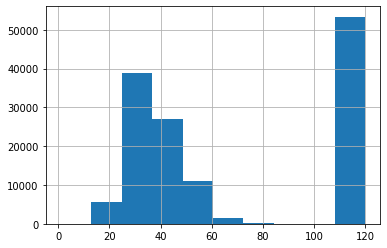

In [92]:
retail_info['age'].hist()
# a lot of customers are over 100, which are highly probably wrong information

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


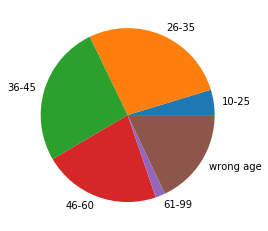

In [99]:
#pie chart of sales from different age group: 10-25, 26-35, 36-45, 46-60, 61-99, other ages(wrong info)
dfage1 = retail_info[(retail_info['age']>=10)&(retail_info['age']<=25) ].agg({'retail_sales':'sum'})
dfage2 = retail_info[(retail_info['age']>=26)&(retail_info['age']<=35) ].agg({'retail_sales':'sum'})
dfage3 = retail_info[(retail_info['age']>=36)&(retail_info['age']<=45) ].agg({'retail_sales':'sum'})
dfage4 = retail_info[(retail_info['age']>=46)&(retail_info['age']<=60) ].agg({'retail_sales':'sum'})
dfage5 = retail_info[(retail_info['age']>=61)&(retail_info['age']<=99) ].agg({'retail_sales':'sum'})
dfage6 = retail_info[(retail_info['age']>=100) | (retail_info['age']<=9) ].agg({'retail_sales':'sum'})
value_lst1 = [dfage1,dfage2,dfage3,dfage4,dfage5,dfage6]
age_lst = ['10-25','26-35','36-45','46-60','61-99','wrong age']
plt.pie(value_lst,labels = age_lst)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


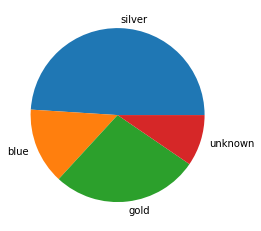

In [101]:
#pie chart of sales from different class
retail_info['current_class'].value_counts()
dfsilver = retail_info[retail_info['current_class']=='silver'].agg({'retail_sales':'sum'})
dfblue = retail_info[retail_info['current_class']=='blue'].agg({'retail_sales':'sum'})
dfgold = retail_info[retail_info['current_class']=='gold'].agg({'retail_sales':'sum'})
dfunknown = retail_info[retail_info['current_class']=='unknown'].agg({'retail_sales':'sum'})
value_lst2 = [dfsilver,dfblue,dfgold,dfunknown]
class_lst = ['silver','blue','gold','unknown']
plt.pie(value_lst2,labels = class_lst)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


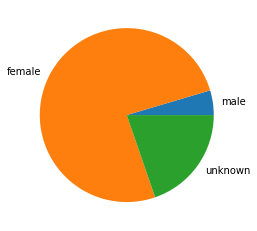

In [102]:
#pie chart of sales from male vs female
dfmale = retail_info[retail_info['gender']=='male'].agg({'retail_sales':'sum'})
dffemale = retail_info[retail_info['gender']=='female'].agg({'retail_sales':'sum'})
dfunknown_gender = retail_info[retail_info['gender']=='unknown'].agg({'retail_sales':'sum'})
value_lst3 = [dfmale,dffemale,dfunknown_gender]
gender_lst = ['male','female','unknown']
plt.pie(value_lst3,labels = gender_lst)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


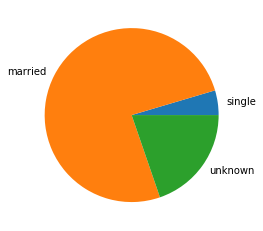

In [103]:
#pie chart of sales from married vs single
dfsingle = retail_info[retail_info['marital_status']=='single'].agg({'retail_sales':'sum'})
dfmarried = retail_info[retail_info['marital_status']=='married'].agg({'retail_sales':'sum'})
dfunknown_marital = retail_info[retail_info['marital_status']=='unknown'].agg({'retail_sales':'sum'})
value_lst4 = [dfsingle,dfmarried,dfunknown_marital]
marital_lst = ['single','married','unknown']
plt.pie(value_lst3,labels = marital_lst)
plt.show()

In [104]:
retail_info_encode = retail.merge(member_df_encode, on = 'member_id', how = 'inner')
retail_info_encode.head(20)

,member_id,retail_sales,discount,birth_yyyymm,first_enrol_date,age,current_class_blue,current_class_gold,current_class_silver,current_class_unknown,gender_female,gender_male,gender_unknown,marital_status_married,marital_status_single,marital_status_unknown
0,1051125,23118.53,8261.08,1972-10-01,2010-01-05,48,0,1,0,0,1,0,0,1,0,0
1,1021377,17267.56,6424.87,1988-07-01,2010-12-30,32,1,0,0,0,1,0,0,1,0,0
2,1024979,14911.67,6341.48,1965-06-01,2014-02-04,55,0,0,0,1,0,0,1,0,0,1
3,1003238,14690.59,8106.57,1982-09-01,2004-04-09,38,0,0,1,0,1,0,0,0,1,0
4,1003028,14386.60,1716.24,1969-11-01,2011-07-10,51,0,1,0,0,1,0,0,0,0,1
5,1012222,13186.28,1188.44,1986-12-01,2008-12-01,34,0,1,0,0,1,0,0,0,1,0
6,1048909,12908.15,3019.32,1964-07-01,2005-04-03,56,0,1,0,0,1,0,0,0,1,0
7,1004336,12647.32,2495.47,1972-06-01,2009-11-05,48,0,1,0,0,1,0,0,1,0,0
8,1012128,11734.33,1398.90,1969-07-01,2010-12-02,51,0,1,0,0,1,0,0,0,0,1
9,1049232,11392.66,2439.52,1964-06-01,2010-03-21,56,0,0,1,0,1,0,0,1,0,0


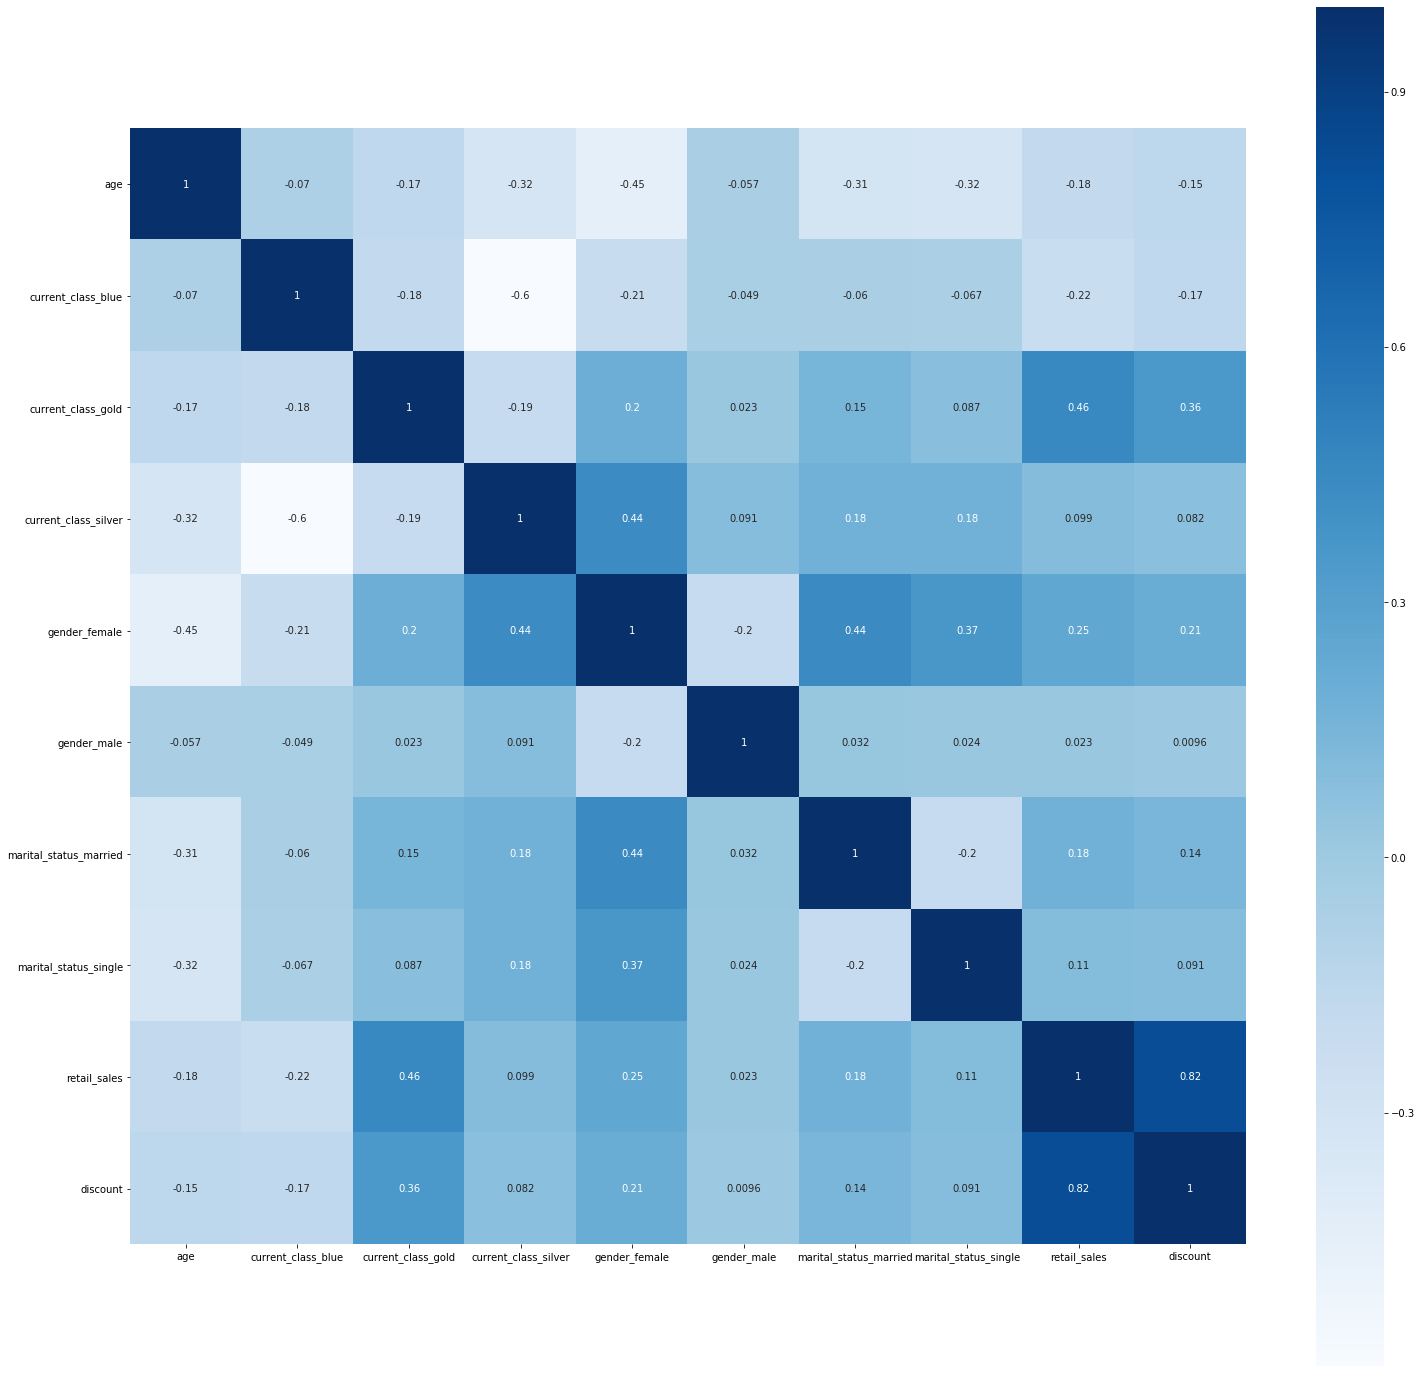

In [105]:
cols = ['age','current_class_blue','current_class_gold','current_class_silver','gender_female','gender_male'
        ,'marital_status_married','marital_status_single','retail_sales','discount']
corr_df = retail_info_encode[cols]
plt.subplots(figsize=(25, 25))
ax = sns.heatmap(corr_df.corr(),annot=True,square=True,cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### join all three tables

In [107]:
trx_product_df =  trx_df.merge(product_df, on = 'dim_product_key', how = 'inner')
full_df = trx_product_df.merge(member_df_encode, on = 'member_id', how = 'inner')
full_df.head()

,dim_site_key,dim_product_key,qty,gross_sales,retail_sales,discount,trx_date,member_id,regime,format,...,current_class_blue,current_class_gold,current_class_silver,current_class_unknown,gender_female,gender_male,gender_unknown,marital_status_married,marital_status_single,marital_status_unknown
0,33,8263,1,13.62,10.22,3.41,2011-08-19,1020729,LIPS,LIP GLOSS,...,1,0,0,0,1,0,0,1,0,0
1,33,7989,1,17.38,13.03,4.34,2011-08-19,1020729,MOISTURISE,BODY LOTION,...,1,0,0,0,1,0,0,1,0,0
2,33,9369,1,17.38,6.57,10.81,2012-10-02,1020729,LIPS,LIP GLOSS,...,1,0,0,0,1,0,0,1,0,0
3,50,9356,1,12.38,9.88,2.50,2013-05-04,1020729,MOISTURISE,HAND CREAM,...,1,0,0,0,1,0,0,1,0,0
4,33,7986,1,12.38,9.28,3.09,2011-08-19,1020729,CLEANSE,BODY WASH,...,1,0,0,0,1,0,0,1,0,0


In [122]:
#explore what are the customers buying different format, and how much contribution to the sales

format_info = full_df.groupby('format').agg({'retail_sales':'sum','age':'mean',"current_class_blue":'sum',
                               'current_class_gold':'sum','current_class_silver':'sum',
                            'gender_female':'sum','gender_male':'sum','marital_status_married':'sum','marital_status_single':'sum'})

format_info = format_info.reset_index()
#format_info.sort_values('retail_sales',ascending=False)
format_info.head()


,format,retail_sales,age,current_class_blue,current_class_gold,current_class_silver,gender_female,gender_male,marital_status_married,marital_status_single
0,ADJUSTING DROPS,7610.65,62.233333,14.0,71.0,90.0,147.0,12.0,61.0,45.0
1,AFTER SHAVE,6011.16,48.595238,45.0,91.0,154.0,226.0,30.0,107.0,77.0
2,AGENDA,80.32,61.250000,0.0,1.0,3.0,3.0,0.0,2.0,1.0
3,BAG,11136.74,43.143719,717.0,1745.0,1964.0,3903.0,199.0,1858.0,1151.0
4,BALM,7696.23,47.302147,400.0,208.0,694.0,1151.0,41.0,416.0,430.0


In [124]:
len(format_info)

163

In [127]:
percent = []
s = format_info['retail_sales'].sum()
for i in range(len(format_info)):
    k = format_info.iloc[i,1]/s
    percent.append(k)
    if k>=0.05:
        print(format_info.iloc[i,0],"'s contribution to the sale is ",k)


BODY BUTTER 's contribution to the sale is  0.06785106507292234
BODY LOTION 's contribution to the sale is  0.05209875177899986
EDT 's contribution to the sale is  0.09514401238255533


In [137]:
#customer demography of these three types of products
three_product=['BODY BUTTER','BODY LOTION','EDT']
format_info[format_info['format']=='BODY BUTTER']

,format,retail_sales,age,current_class_blue,current_class_gold,current_class_silver,gender_female,gender_male,marital_status_married,marital_status_single
24,BODY BUTTER,2.156329e+06,49.756682,14087.0,24026.0,46248.0,71581.0,3667.0,32695.0,20117.0


In [138]:
format_info[format_info['format']=='BODY LOTION']

,format,retail_sales,age,current_class_blue,current_class_gold,current_class_silver,gender_female,gender_male,marital_status_married,marital_status_single
28,BODY LOTION,1.655715e+06,50.80166,15413.0,19463.0,42526.0,63816.0,3518.0,29362.0,18682.0


In [140]:
format_info[format_info['format']=='EDT']

,format,retail_sales,age,current_class_blue,current_class_gold,current_class_silver,gender_female,gender_male,marital_status_married,marital_status_single
55,EDT,3023707.72,53.686714,16875.0,18766.0,48474.0,67659.0,5298.0,30329.0,20002.0


In [160]:
trx_product_df.head()

,dim_site_key,dim_product_key,qty,gross_sales,retail_sales,discount,trx_date,member_id,regime,format,dept_code,class_code,dept_label,class_label
0,33,8263,1,13.62,10.22,3.41,2011-08-19,1020729,LIPS,LIP GLOSS,D25,C25400,MAKEUP,LIPS
1,71,8263,1,13.62,11.58,2.04,2011-12-20,1018839,LIPS,LIP GLOSS,D25,C25400,MAKEUP,LIPS
2,33,8263,1,13.62,0.00,13.62,2011-06-25,1103314,LIPS,LIP GLOSS,D25,C25400,MAKEUP,LIPS
3,33,8263,1,13.62,13.62,0.00,2011-08-25,1074948,LIPS,LIP GLOSS,D25,C25400,MAKEUP,LIPS
4,71,8263,1,13.62,13.62,0.00,2011-01-23,1009423,LIPS,LIP GLOSS,D25,C25400,MAKEUP,LIPS


In [175]:

#create empty dictionary with member_id as key, products format this member bought as value
purchase_info = dict()
for i in member_df['member_id']:
    purchase_info[i]=trx_product_df['format'][trx_product_df['member_id']==i]
    